<a href="https://colab.research.google.com/github/Abdu1964/G6/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Set Up**

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

## **Load Data**

In [ ]:
df = pd.read_csv('creditcard.csv')
print(df.head())
print("\nDataset shape:", df.shape)
print("\nClass distribution:\n", df['Class'].value_counts())
print("\nPercentage of frauds: {:.4f}%".format(df['Class'].mean()*100))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## **Data Preprocess**

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTraining set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Training set shape: (227845, 30)
Test set shape: (56962, 30)


## **Logistic Regression Function**

In [ ]:
def train_logistic_regression(C_value=1.0):
    print(f"\n{'='*50}\nLogistic Regression with C={C_value}\n{'='*50}")

    lr = LogisticRegression(C=C_value, solver='lbfgs', max_iter=1000, random_state=42)
    lr.fit(X_train_scaled, y_train)

    y_pred = lr.predict(X_test_scaled)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (C={C_value})')
    plt.show()

    return {
        'C': C_value,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

## **Logistic Regression Model Evaluation**


Logistic Regression with C=0.01

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.61      0.70        98

    accuracy                           1.00     56962
   macro avg       0.91      0.81      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:


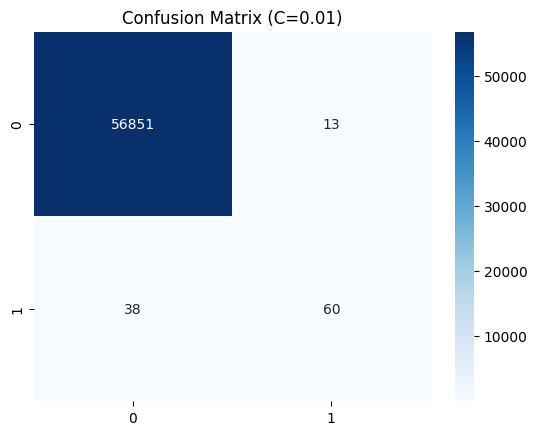


Logistic Regression with C=0.1

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:


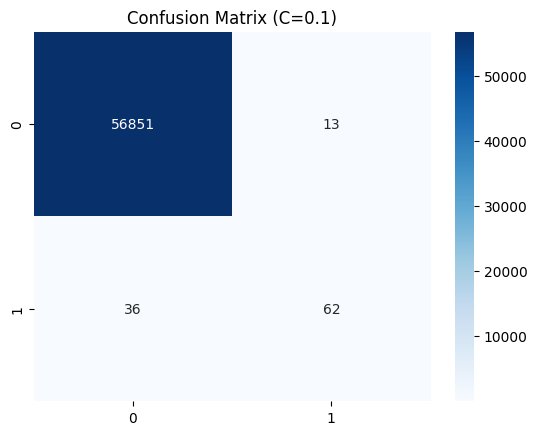


Logistic Regression with C=1

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:


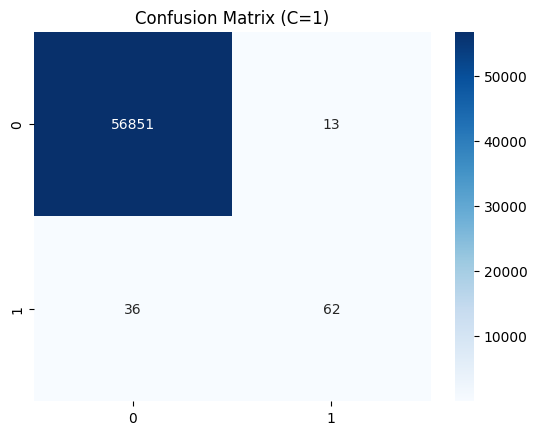


Logistic Regression with C=10

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:


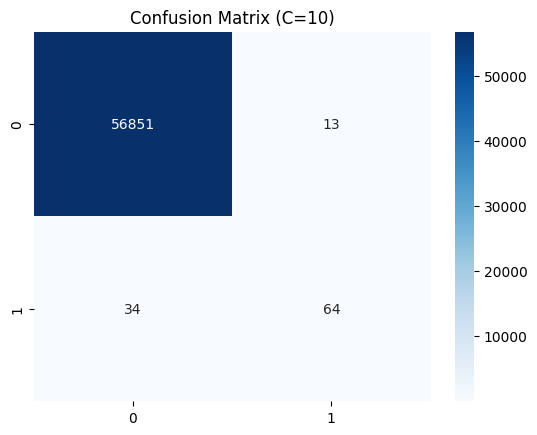


Logistic Regression Performance Comparison:
       C  accuracy  precision    recall        f1
0   0.01  0.999105   0.821918  0.612245  0.701754
1   0.10  0.999140   0.826667  0.632653  0.716763
2   1.00  0.999140   0.826667  0.632653  0.716763
3  10.00  0.999175   0.831169  0.653061  0.731429


In [ ]:
c_values = [0.01, 0.1, 1, 10]
lr_results = []

for c in c_values:
    lr_results.append(train_logistic_regression(c))

lr_comparison = pd.DataFrame(lr_results)
print("\nLogistic Regression Performance Comparison:")
print(lr_comparison)

## **Pytorch Data**

In [ ]:

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

## **Neural Network**

In [ ]:

class FraudDetector(nn.Module):
    def __init__(self, input_dim):
        super(FraudDetector, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.layer2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

input_dim = X_train_scaled.shape[1]
model = FraudDetector(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## **Train Neural Network**


Training Neural Network...
Epoch 1/20, Loss: 0.0194
Epoch 2/20, Loss: 0.0031
Epoch 3/20, Loss: 0.0028
Epoch 4/20, Loss: 0.0026
Epoch 5/20, Loss: 0.0024
Epoch 6/20, Loss: 0.0023
Epoch 7/20, Loss: 0.0022
Epoch 8/20, Loss: 0.0021
Epoch 9/20, Loss: 0.0020
Epoch 10/20, Loss: 0.0019
Epoch 11/20, Loss: 0.0018
Epoch 12/20, Loss: 0.0017
Epoch 13/20, Loss: 0.0017
Epoch 14/20, Loss: 0.0017
Epoch 15/20, Loss: 0.0015
Epoch 16/20, Loss: 0.0016
Epoch 17/20, Loss: 0.0015
Epoch 18/20, Loss: 0.0015
Epoch 19/20, Loss: 0.0015
Epoch 20/20, Loss: 0.0014


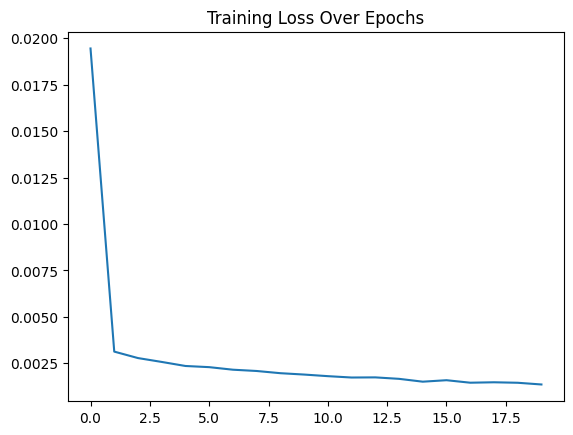

In [ ]:

epochs = 20
train_losses = []

print("\nTraining Neural Network...")
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

plt.plot(train_losses)
plt.title('Training Loss Over Epochs')
plt.show()

## **Evaluate Neural Network**


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



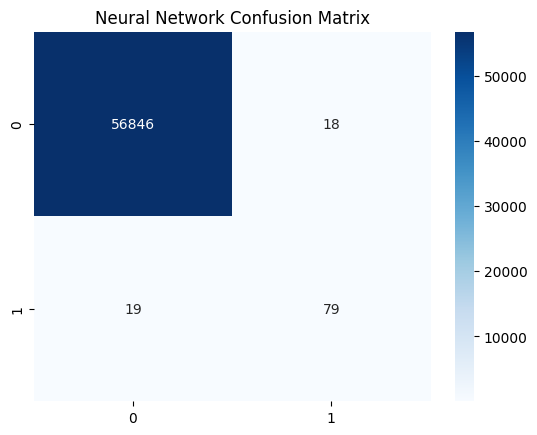

In [ ]:

model.eval()
with torch.no_grad():
    y_pred_proba = model(X_test_tensor)
    y_pred = (y_pred_proba > 0.5).float()

    y_pred_np = y_pred.numpy().flatten()
    y_test_np = y_test_tensor.numpy().flatten()

    print("\nClassification Report:")
    print(classification_report(y_test_np, y_pred_np))

    cm = confusion_matrix(y_test_np, y_pred_np)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Neural Network Confusion Matrix')
    plt.show()

    nn_metrics = {
        'accuracy': accuracy_score(y_test_np, y_pred_np),
        'precision': precision_score(y_test_np, y_pred_np),
        'recall': recall_score(y_test_np, y_pred_np),
        'f1': f1_score(y_test_np, y_pred_np)
    }

# **Compare Model**


Model Performance Comparison:
           Logistic Regression (C=1)  Neural Network
accuracy                    0.999140        0.999350
precision                   0.826667        0.814433
recall                      0.632653        0.806122
f1                          0.716763        0.810256


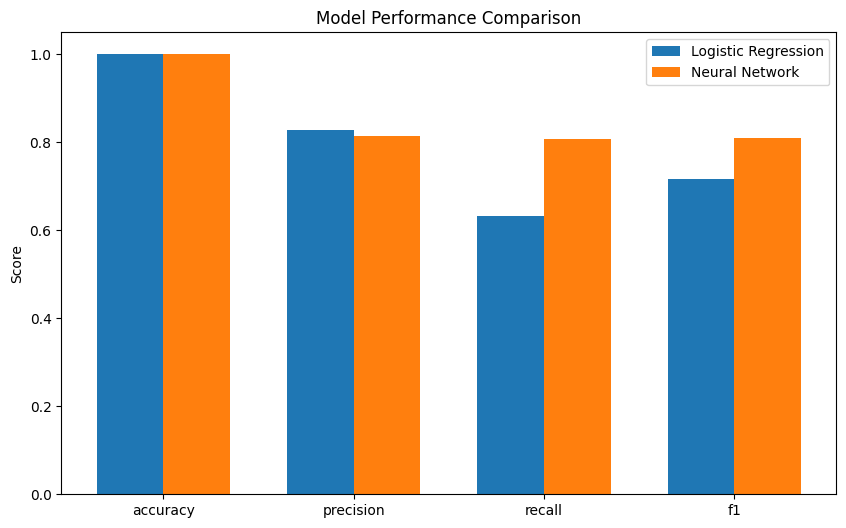

In [ ]:

print("\nModel Performance Comparison:")
comparison_df = pd.DataFrame({
    'Logistic Regression (C=1)': lr_results[2],
    'Neural Network': nn_metrics
}).drop('C')

print(comparison_df)

metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, comparison_df.loc[metrics, 'Logistic Regression (C=1)'],
       width, label='Logistic Regression')
ax.bar(x + width/2, comparison_df.loc[metrics, 'Neural Network'],
       width, label='Neural Network')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()